
# Neural Networks - The Idea

**Author: Dr. Aydede**  
*Last Updated: 20/04/2024*
**NLP and LLM Worlshop**

Neural networks (NN) are a class of models inspired by the human brain. **They are, however, parametric models**, and they are used for supervised learning.

## 1. The Idea

### 1.1 Polynomial Regression

Let's start with a predictive model with a single input (covariate). The simplest model could be a linear model:

$$
y \approx \alpha + \beta x
$$

Since this model could be quite restrictive, we can have a more flexible one by a polynomial regression:

$$
y \approx \alpha + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \ldots = \alpha + \sum_{m=1}^M \beta_m x^m
$$

The polynomial regression is based on fixed components, or bases: $x, x^2, x^3, \ldots, x^M$. 

Let us consider a realistic (simulated) sample:


Please create `condaNN` conda environment first, or transfer it from `condaNN.yml`

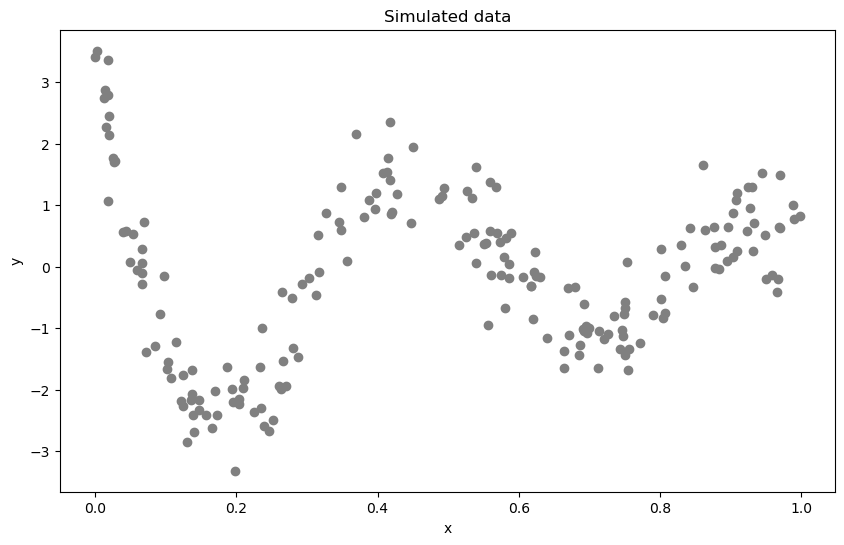

          y         x
0  3.409236  0.000114
1  3.511575  0.002870
2  2.737326  0.012556
3  2.879893  0.013952
4  2.273655  0.015821


In [5]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set parameters
n = 200
np.random.seed(1)

# Generate data
x = np.sort(np.random.uniform(size=n))
y = np.sin(12 * (x + 0.2)) / (x + 0.2) + np.random.normal(scale=0.5, size=n)

# Create DataFrame
df = pd.DataFrame({'y': y, 'x': x})

# Create plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='grey')
plt.title("Simulated data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Print first few rows of the dataframe
print(df.head())


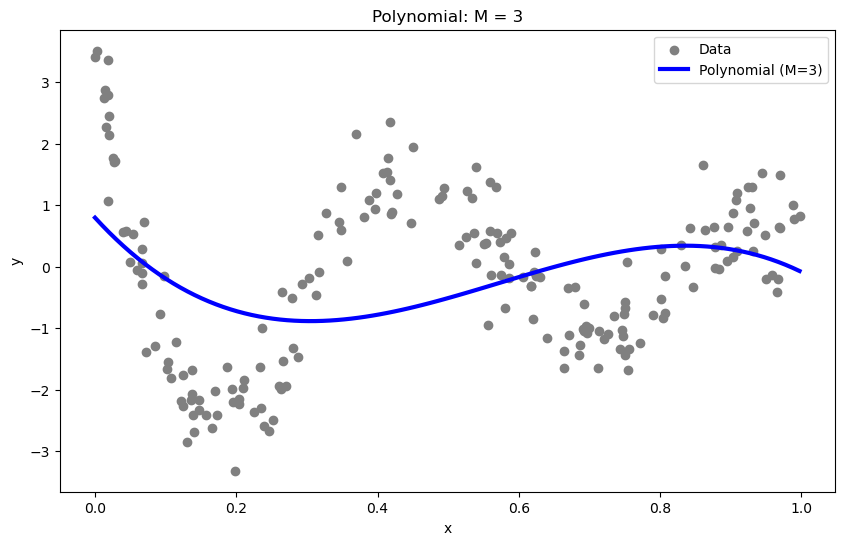

Intercept: 0.7975591282282268
Coefficients: [  0.         -12.57145444  28.12548218 -16.4384288 ]


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create the polynomial regression model
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Fit the model
X = df['x'].values.reshape(-1, 1)
y = df['y'].values
poly_model.fit(X, y)

# Generate predictions
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = poly_model.predict(X_plot)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color='grey', label='Data')
plt.plot(X_plot, y_plot, color='blue', linewidth=3, label='Polynomial (M=3)')
plt.title("Polynomial: M = 3")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Print the coefficients
coefficients = poly_model.named_steps['linearregression'].coef_
intercept = poly_model.named_steps['linearregression'].intercept_
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")


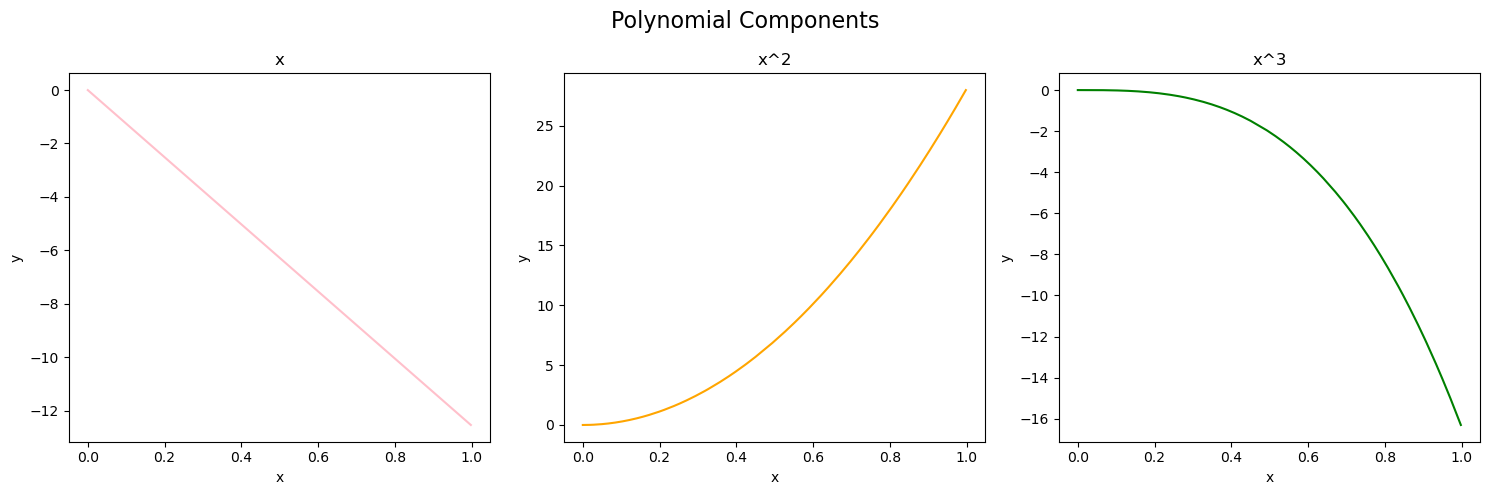

In [4]:

# Extract coefficients
coefficients = poly_model.named_steps['linearregression'].coef_
intercept = poly_model.named_steps['linearregression'].intercept_

# Calculate individual components
x = df['x'].values
first = coefficients[1] * x
second = coefficients[2] * x**2
third = coefficients[3] * x**3

# Calculate yhat (predicted y)
yhat = intercept + first + second + third

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Polynomial Components", fontsize=16)

# Plot each component
ax1.plot(x, first, color='pink')
ax1.set_title('x')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(x, second, color='orange')
ax2.set_title('x^2')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

ax3.plot(x, third, color='green')
ax3.set_title('x^3')
ax3.set_xlabel('x')
ax3.set_ylabel('y')

plt.tight_layout()
plt.show()


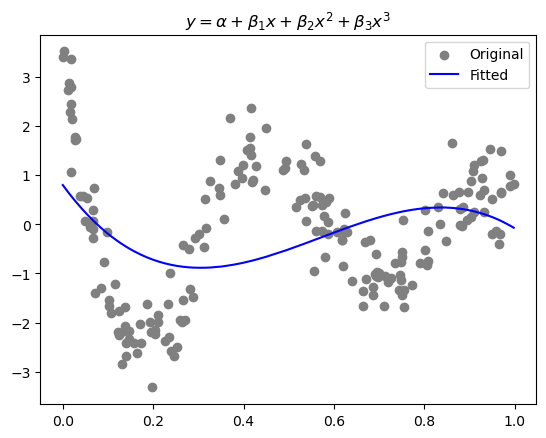

In [5]:

# Sum of components
y_hat = intercept + first + second + third

plt.scatter(x, y, color='grey', label='Original')
plt.plot(x, y_hat, color='blue', label='Fitted')
plt.title(r'$y = \alpha + \beta_1x + \beta_2x^2 + \beta_3x^3$')
plt.legend()
plt.show()


### 1.2 Polynomial to Neural Network

The artificial neural net replaces these fixed components with **adjustable ones or bases**
  
$$
f\left(\alpha_1+\delta_1 x\right), f\left(\alpha_2+\delta_2 x\right), \ldots, f\left(\alpha_M+\delta_M x\right)
$$ 
  
where $f(.)$ is an activation function.  We can see the first simple ANN as nonlinear functions of linear combinations:

$$
\begin{gathered}
y \approx \alpha+\beta_1 f\left(\alpha_1+\delta_1 x\right)+\beta_2 f\left(\alpha_2+\delta_2 x\right)+\beta_3 f\left(\alpha_3+\delta_3 x\right)+\ldots \\
=\alpha+\sum_{m=1}^M \beta_m f\left(\alpha_m+\delta_m x\right)
\end{gathered}
$$
where $f(.)$ is an activation function$:  
  
- The logistic (or sigmoid) function: $f(x)=\frac{1}{1+e^{-x}}$; 
- The hyperbolic tangent function: $f(x)=\tanh (x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$; 
- The Rectified Linear Unit (ReLU): $f(x)=\max (0, x)$;  

Hence, adjustable components enable to capture complex models with fewer components (smaller M).

Let's replace those fixed components $x, x^2, x^3$ in our polynomial regression with $f\left(\alpha_1+\delta_1 x\right)$, $f\left(\alpha_2+\delta_2 x\right), f\left(\alpha_3+\delta_3 x\right)$.

The following code demonstrates the ability of a simple artificial neural network (ANN) with arbitrary parameters to capture the underlying signal relative to a third-degree polynomial regression model. It defines an ANN function with sigmoid activation functions for three nodes $(M=3)$, arbitrary parameters `a` , `b` , `beta` , and an intercept ( `int` ). For each node, the code calculates the weighted input ( $z$ ) using `a` and `b` , and then applies the sigmoid activation function to obtain the output ( `sig` ). The output is then multiplied by the corresponding beta value. The final output ( `yhat` ) is calculated as the sum of the intercept and the weighted outputs from all three nodes.


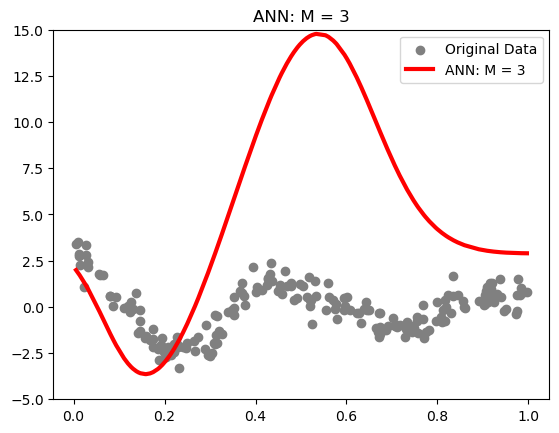

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Given constants
a = np.array([1.5, 9, 3])
b = np.array([-20, -14, -8])
beta = np.array([15, 25, -40])
intercept = 3

# Simulated data (as from the original notebook)
x = np.sort(np.random.rand(200))

# Define the ANN function
def ann(a, b, beta, intercept):
    # 1st sigmoid
    z1 = a[0] + b[0] * x
    sig1 = 1 / (1 + np.exp(-z1))
    
    # 2nd sigmoid
    z2 = a[1] + b[1] * x
    sig2 = 1 / (1 + np.exp(-z2))
    
    # 3rd sigmoid
    z3 = a[2] + b[2] * x
    sig3 = 1 / (1 + np.exp(-z3))
    
    # Final output
    yhat = intercept + beta[0] * sig1 + beta[1] * sig2 + beta[2] * sig3
    return yhat

# Compute the output
yhat = ann(a, b, beta, intercept)

# Plotting the original data and the ANN prediction
plt.scatter(x, y, color='grey', label='Original Data')
plt.plot(x, yhat, color='red', linewidth=3, label='ANN: M = 3')
plt.ylim(-5, 15)
plt.title('ANN: M = 3')
plt.legend()
plt.show()


For now, let’s obtain them with `neuralnet`. Using `rpy2` would allow us to directly use R's `neuralnet` package, which should give us the exact same results as my original R code (see NN.html and Pyhon_for_data.html for more).  For this you need run this using bash: `pip install rpy2` when your enviroenment is activated. This method has several advantages:

- You're using the exact same R code, ensuring consistent results.
- You don't need to translate between R and Python, reducing the chance of errors.
- You can easily switch between R and Python in your notebook as needed.

If you want to access the results in Python after running this R code, you can use the %R magic command. (see below)

In [1]:
%load_ext rpy2.ipython



The downloaded binary packages are in
	/var/folders/b2/gpnsjh9j6bv5prtx7w5lsym80000gp/T//RtmpJu5goH/downloaded_packages


Loading required package: neuralnet
also installing the dependencies ‘pkgbuild’, ‘diffobj’, ‘brio’, ‘desc’, ‘pkgload’, ‘praise’, ‘waldo’, ‘Deriv’, ‘testthat’

trying URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.4/pkgbuild_1.4.4.tgz'
Content type 'application/x-gzip' length 202734 bytes (197 KB)
downloaded 197 KB

trying URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.4/diffobj_0.3.5.tgz'
Content type 'application/x-gzip' length 1032196 bytes (1008 KB)
downloaded 1008 KB

trying URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.4/brio_1.1.5.tgz'
Content type 'application/x-gzip' length 46684 bytes (45 KB)
downloaded 45 KB

trying URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.4/desc_1.4.3.tgz'
Content type 'application/x-gzip' length 335869 bytes (327 KB)
downloaded 327 KB

trying URL 'https://cloud.r-project.org/bin/macosx/big-sur-arm64/contrib/4.4/pkgload_1.4.0.tgz'
Content type 'application/x-gzip' leng

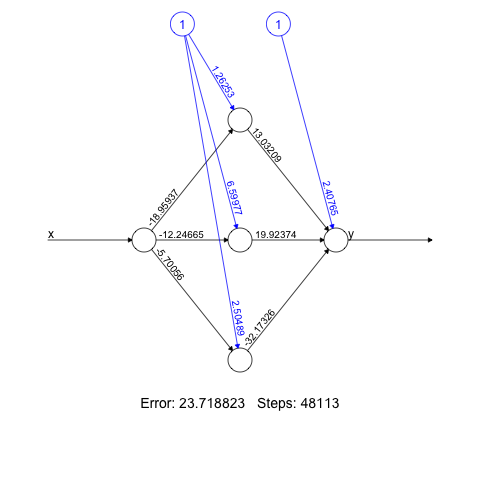

In [2]:
%%R
# Install and load the neuralnet package
options(repos = c(CRAN = "https://cloud.r-project.org"))

# Install and load the neuralnet package
if (!require(neuralnet)) {
  install.packages("neuralnet", dependencies = TRUE)
}
library(neuralnet)

# data generation
n <- 200
set.seed(1)
x <- sort(runif(n))
y <- sin(12*(x + 0.2))/(x + 0.2) + rnorm(n)/2
df <- data.frame(y, x)

# neural network model
set.seed(2)
nn <- neuralnet(y ~ x, data = df, hidden = 3, threshold = 0.05) 
yhat <- compute(nn, data.frame(x))$net.result
plot(x, y, main = "Neural Networks: M = 3")
lines(x, yhat, col = "red", lwd = 3)

nn$weights
plot(nn, rep = "best")

Why did neural networks perform better than polynomial regression in the previous example? Again, adjustable components enable to capture complex models. Let’s delve little deeper. Here is the weight structure of

$$
\begin{gathered}
y \approx \alpha+\sum_{m=1}^3 \beta_m f\left(\alpha_m+\delta_m x\right) \\
=\alpha+\beta_1 f\left(\alpha_1+\delta_1 x\right)+\beta_2 f\left(\alpha_2+\delta_2 x\right)+\beta_3 f\left(\alpha_3+\delta_3 x\right)
\end{gathered}
$$

- Error: It represents the final error of the best-performing neural network after the training process has concluded. It's a snapshot of how well (or not) your model has learned the underlying pattern in our data. 
- Steps: The 48113' is the number of steps (iterations) the algorithm took to reach its current state, under the constraints we provided (like learning rate, threshold, etc.). It's a testament to how hard your network worked to get to its final form.  
  
We used sigmoid (logistic) activation functions
  
Node 1: $\quad f(x)=\frac{1}{1+e^{-x}}=\frac{1}{1+e^{-(1.26253-18.95937 x)}}$.  
Node 2: $\quad f(x)=\frac{1}{1+e^{-x}}=\frac{1}{1+e^{-(6.599773-12.24665 x)}}$.  
Node 3: $\quad f(x)=\frac{1}{1+e^{-x}}=\frac{1}{1+e^{-(2.504890-5.700564 x)}}$.  

We can calculate the value of each activation function by using our data, $x$ :

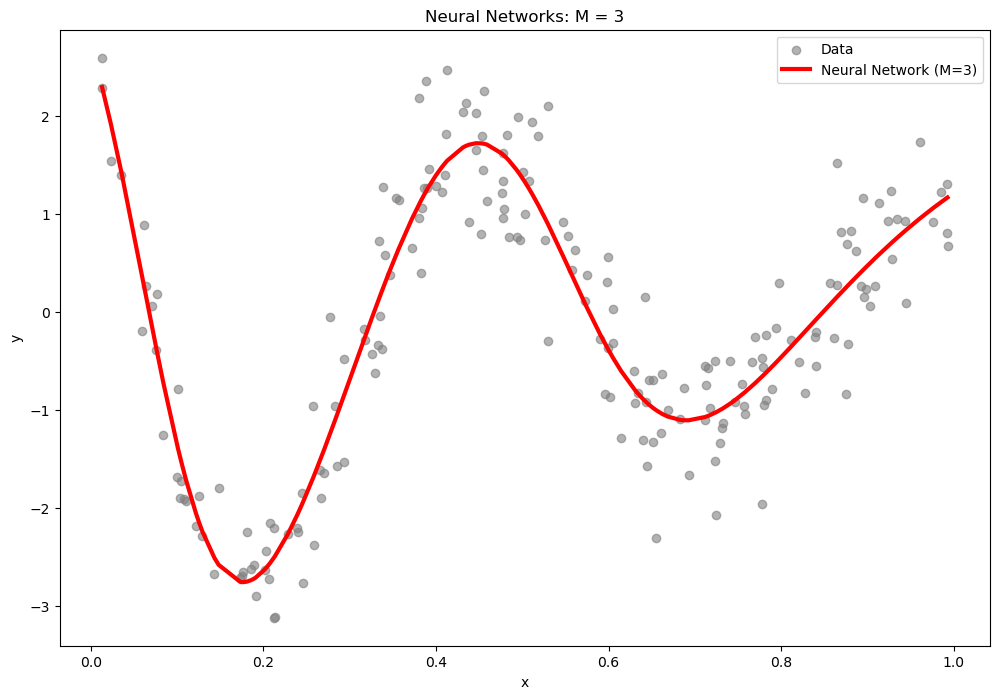

In [10]:
# Access x and y in Python
x = %R x
y = %R y

# Access yhat in Python
yhat = %R yhat

# Now you can use these variables in Python, e.g., to create a plot using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='grey', alpha=0.6, label='Data')
plt.plot(x, yhat, color='red', linewidth=3, label='Neural Network (M=3)')
plt.title("Neural Networks: M = 3")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

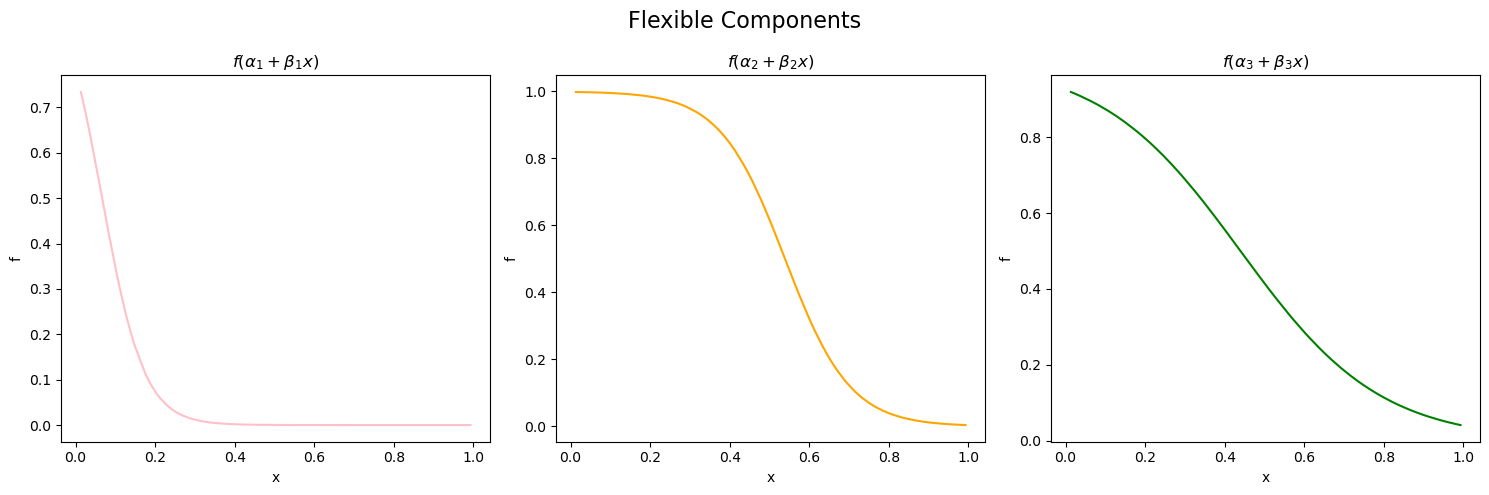

Weights for node 1: [  1.26252963 -18.95936777]
Weights for node 2: [  6.59976968 -12.24664665]
Weights for node 3: [ 2.5048904  -5.70056409]


In [8]:

# Get x and weights from R
x = %R x
weights = %R nn$weights[[1]][[1]]

# Convert to numpy arrays if they aren't already
x = np.array(x)
weights = np.array(weights)

# Create X matrix
X = np.column_stack((np.ones_like(x), x))

# Define activation function (assuming it's logistic/sigmoid)
def act_fct(x):
    return 1 / (1 + np.exp(-x))

# Calculate outputs for each node
f1 = act_fct(X @ weights[:, 0])
f2 = act_fct(X @ weights[:, 1])
f3 = act_fct(X @ weights[:, 2])

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Flexible Components", fontsize=16)

# Plot for first node
ax1.plot(x, f1, color="pink")
ax1.set_title(r'$f(\alpha_1 + \beta_1x)$')
ax1.set_xlabel('x')
ax1.set_ylabel('f')

# Plot for second node
ax2.plot(x, f2, color="orange")
ax2.set_title(r'$f(\alpha_2 + \beta_2x)$')
ax2.set_xlabel('x')
ax2.set_ylabel('f')

# Plot for third node
ax3.plot(x, f3, color="green")
ax3.set_title(r'$f(\alpha_3 + \beta_3x)$')
ax3.set_xlabel('x')
ax3.set_ylabel('f')

plt.tight_layout()
plt.show()

# Print the weights for each node
print("Weights for node 1:", weights[:, 0])
print("Weights for node 2:", weights[:, 1])
print("Weights for node 3:", weights[:, 2])

Now we will go from these nodes to the "sink":
$$
\begin{aligned}
& \frac{1}{1+e^{-(1.26253-18.95937 x)}} \times 13.032092 \\
& \frac{1}{1+e^{-(6.599773-12.24665 x)}} \times 19.923742 \\
& \frac{1}{1+e^{-(2.504890-5.700564 x)}} \times-32.173264
\end{aligned}
$$

Finally, we will add these with a "bias", the intercept:
$$
\begin{gathered}
\frac{1}{2.407654+} \\
\frac{1}{1+e^{-(1.26253-18.95937 x)}} \times 13.032092+ \\
\frac{1}{1+e^{-(6.599773-12.24665 x)}} \times 19.923742+ \\
\frac{1}{1+e^{-(2.504890-5.700564 x)}} \times-32.173264
\end{gathered}
$$


In [11]:
%R -i f1 -i f2 -i f3

The `%R -i` option is used to import Python variables into R before running R code.
After using %R -i, those variables (f1, f2, f3) are available directly in the R environment.

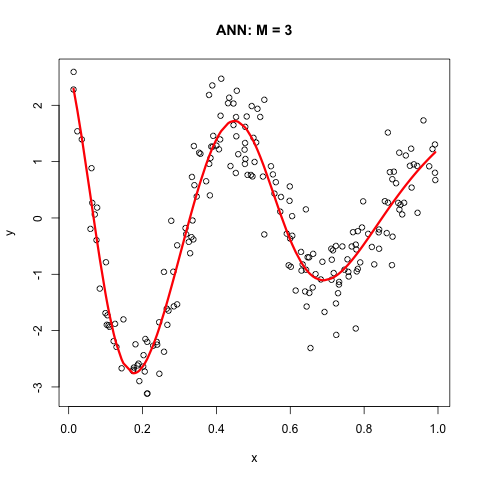

In [12]:
%%R

# Ensure variables are in the correct format (e.g., vectors)
f1 <- as.numeric(f1)
f2 <- as.numeric(f2)
f3 <- as.numeric(f3)

# From Nodes to sink (Y)
f12 <- f1*nn$weights[[1]][[2]][2]
f22 <- f2*nn$weights[[1]][[2]][3]
f23 <- f3*nn$weights[[1]][[2]][4]

# Results
yhat <- nn$weights[[1]][[2]][1] + f12 + f22 + f23
plot(x, y, main="ANN: M = 3")
lines(x, yhat, col="red", lwd = 3)

## 2. Neural Networks - More inputs

With a set of covariates $X=\left(1, x_1, x_2, \ldots, x_k\right)$, we have:
  
$$
\begin{gathered}
y \approx \alpha+\sum_{m=1}^M \beta_m f\left(\alpha_m+\mathbf{X} \delta_m\right)= \\
=\alpha+\beta_1 f\left(\alpha_1+\delta_{11} x_{1 i}+\delta_{12} x_{2 i} \cdots+\delta_{1 k} x_{k i}\right)+\ldots \\
+\beta_M f\left(\alpha_{M 1}+\delta_{M 1} x_{1 i}+\delta_{M 2} x_{2 i} \cdots+\delta_{M k} x_{k i}\right)
\end{gathered}
$$
We will use the `neuralnet` package


In [13]:
%%R

library(MASS)
data("Boston")
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [14]:
%%R
normalizedBoston <- as.data.frame(scale(Boston))

set.seed(123) # For reproducibility
ind <- sample(1:nrow(normalizedBoston), size = 0.8 * nrow(normalizedBoston))
train_data <- normalizedBoston[ind, ]
test_data <- normalizedBoston[-ind, ]

train_targets <- train_data$medv
test_targets <- test_data$medv

train_data$medv <- NULL
test_data$medv <- NULL

The `neuralnet` package requires the inputs as a dataframe and the targets (in this case, the `medv` variable for median house value) either as a separate vector or as part of the dataframe. 

In [15]:
%%R

library(neuralnet)

# Define the formula
formula <- paste("train_targets ~", paste(names(train_data), collapse = " + "))

# Train the neural network
set.seed(123) # For reproducibility
nn1 <- neuralnet(formula, data = cbind(train_targets, train_data), hidden = c(5), linear.output = TRUE)

In this example, `hidden=c(5)` defines a neural network with one hidden layer containing 5 (3) neurons. `linear.output=TRUE` is used because this is a regression problem.

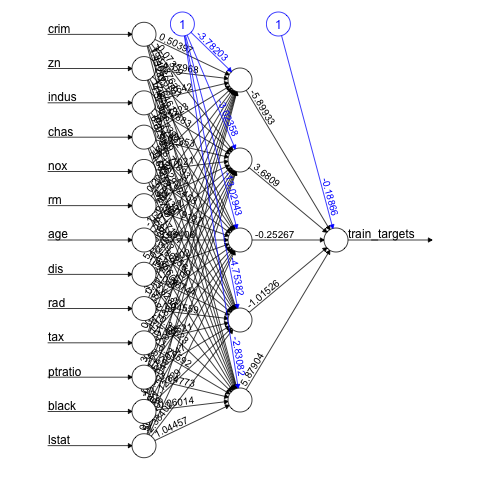

In [16]:
%%R
plot(nn1, rep = "best")

In [24]:
%%R
mse.test1 <- mean((test_targets - predict(nn1, test_data))^2)
mse.test1

[1] 0.1894812
